# Criação de histogramas e UBMGs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

## Separação dos dados por usuário

In [2]:
df = pd.read_csv('./cluster-results/labeled_df.tsv', sep='\t')

df = df.sort_values(by='timestamp', ascending=True)

df.head(10)

,Unnamed: 0,index,MI_max,MI_super_max,MI_super_avg,user,group,timestamp,labels
2648010,2648010,0,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458866e+09,1
2648011,2648011,1,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458866e+09,1
2648012,2648012,2,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458867e+09,1
2648013,2648013,3,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458867e+09,1
2648014,2648014,4,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458867e+09,1
2648015,2648015,5,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458867e+09,1
2648016,2648016,6,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458867e+09,1
2648017,2648017,7,0.0,0.0,0.0,187754506,187754506--1001034598292,1.458867e+09,1
517273,517273,0,0.0,0.0,0.0,83860966,83860966--1001034598292,1.459040e+09,1
1913989,1913989,0,0.0,0.0,0.0,30358316,30358316--1001034598292,1.459040e+09,1


In [3]:
def make_users_datas(users, path, data):
    for user in users:
        filtered = data.query("group == '%s'" % user)
        filtered.to_csv(path + '/' + user + '.tsv', sep='\t')

In [4]:
unique_users = df['group'].unique()
path = './users-influences'

if not os.path.exists(path):
    os.makedirs(path)
    make_users_datas(unique_users, path, df)

##  Plot histograma de mensagens

SpearmanrResult(correlation=0.391119990833471, pvalue=0.0)


/tmp/ipykernel_28472/517862907.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


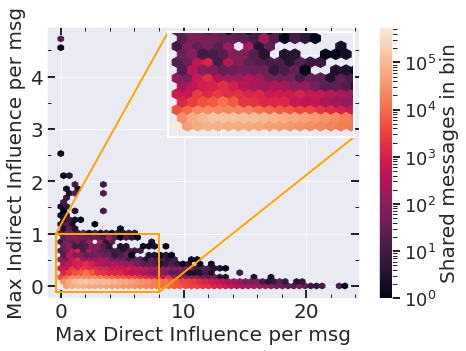

<Figure size 432x288 with 0 Axes>

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
from scipy import stats as st

minorLocatory = AutoMinorLocator(2)
minorLocatorx = AutoMinorLocator(5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.tick_params(axis='both', length=8, width=2, which='major', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)
ax.tick_params(axis='both', length=4, width=1, which='minor', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

xvalues = df.MI_max.values  #T.T[0]#
yvalues = df.MI_super_max.values  #T.T[1]#

corr = st.spearmanr(xvalues, yvalues)
print(corr)

#plt.hist2d(xvalues,yvalues, bins=4, cmap='Blues')
plt.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # ,cmap='magma_r' Blues magma magma_r viridis
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18, length=8, width=2)
cb.ax.tick_params(length=5, width=1, which='minor')
cb.set_label('Shared messages in bin', fontsize=20)

plt.rcParams.update({'font.family': 'sans-serif', 'axes.linewidth': '2.'})

#plt.title(r'Spearman: $\rho_s = %.2f$'%(corr[0]),fontsize=20)
plt.xlabel('Max Direct Influence per msg', fontsize=20)
plt.ylabel('Max Indirect Influence per msg', fontsize=20)

# Create the zoomed axes
axins = zoomed_inset_axes(ax, 1.8, loc=1)  # zoom = 3, location = 1 (upper right)
axins.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # cmap='magma_r' Blues magma magma_r viridis

# sub region of the original image
x1, x2, y1, y2 = -0.4, 8, -0.12, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

# draw bboxes of the two regions of the inset axes in the parent axes and
# connect lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="orange", alpha=0.99, lw=2.)

#plt.xlim(-1,5)
#plt.ylim(-1,2)

#plt.xlim(-0.4,10)
#plt.ylim(-0.,0.3)

plt.draw()
# plt.savefig('./cluster-results/'+'scatter-plot-msgs.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

SpearmanrResult(correlation=0.3059350705690601, pvalue=0.0)


/tmp/ipykernel_28472/4022753149.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


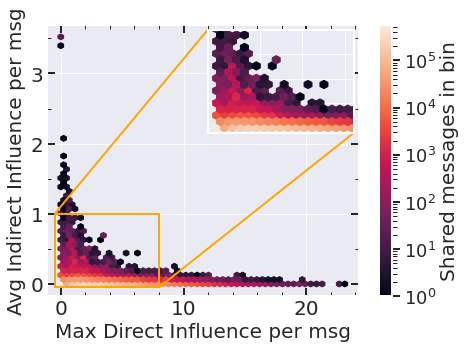

<Figure size 432x288 with 0 Axes>

In [6]:
minorLocatory = AutoMinorLocator(2)
minorLocatorx = AutoMinorLocator(5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.tick_params(axis='both', length=8, width=2, which='major', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)
ax.tick_params(axis='both', length=4, width=1, which='minor', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

xvalues = df.MI_max.values  #T.T[0]#
yvalues = df.MI_super_avg.values  #T.T[1]#

corr = st.spearmanr(xvalues, yvalues)
print(corr)

#plt.hist2d(xvalues,yvalues, bins=4, cmap='Blues')
plt.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # ,cmap='magma_r' Blues magma magma_r viridis
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18, length=8, width=2)
cb.ax.tick_params(length=5, width=1, which='minor')
cb.set_label('Shared messages in bin', fontsize=20)

plt.rcParams.update({'font.family': 'sans-serif', 'axes.linewidth': '2.'})

#plt.title(r'Spearman: $\rho_s = %.2f$'%(corr[0]),fontsize=20)
plt.xlabel('Max Direct Influence per msg', fontsize=20)
plt.ylabel('Avg Indirect Influence per msg', fontsize=20)

# Create the zoomed axes
axins = zoomed_inset_axes(ax, 1.4, loc=1)  # zoom = 3, location = 1 (upper right)
axins.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # cmap='magma_r' Blues magma magma_r viridis

# sub region of the original image
x1, x2, y1, y2 = -0.5, 8, -0.05, 1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

# draw bboxes of the two regions of the inset axes in the parent axes and
# connect lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="orange", alpha=0.99, lw=2.)

#plt.xlim(-1,5)
#plt.ylim(-1,2)

#plt.xlim(-0.4,10)
#plt.ylim(-0.,0.3)

plt.draw()
# plt.savefig('./cluster-results/'+'scatter-plot-msgs.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

SpearmanrResult(correlation=0.758069508758647, pvalue=0.0)


/tmp/ipykernel_28472/2556953076.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


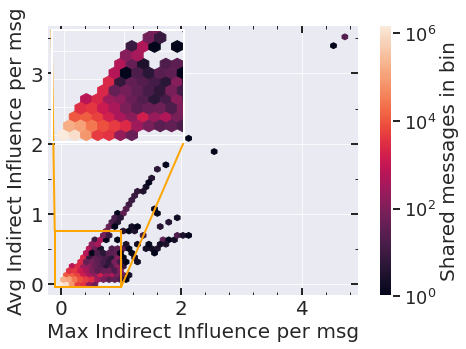

<Figure size 432x288 with 0 Axes>

In [7]:
minorLocatory = AutoMinorLocator(2)
minorLocatorx = AutoMinorLocator(5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.tick_params(axis='both', length=8, width=2, which='major', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)
ax.tick_params(axis='both', length=4, width=1, which='minor', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

xvalues = df.MI_super_max.values  #T.T[0]#
yvalues = df.MI_super_avg.values  #T.T[1]#

corr = st.spearmanr(xvalues, yvalues)
print(corr)

#plt.hist2d(xvalues,yvalues, bins=4, cmap='Blues')
plt.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # ,cmap='magma_r' Blues magma magma_r viridis
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18, length=8, width=2)
cb.ax.tick_params(length=5, width=1, which='minor')
cb.set_label('Shared messages in bin', fontsize=20)

plt.rcParams.update({'font.family': 'sans-serif', 'axes.linewidth': '2.'})

#plt.title(r'Spearman: $\rho_s = %.2f$'%(corr[0]),fontsize=20)
plt.xlabel('Max Indirect Influence per msg', fontsize=20)
plt.ylabel('Avg Indirect Influence per msg', fontsize=20)

# Create the zoomed axes
axins = zoomed_inset_axes(ax, 2, loc='upper left')  # zoom = 3, location = 1 (upper right)
axins.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # cmap='magma_r' Blues magma magma_r viridis

# sub region of the original image
x1, x2, y1, y2 = -0.1, 1, -0.05, 0.75
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

# draw bboxes of the two regions of the inset axes in the parent axes and
# connect lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="orange", alpha=0.99, lw=2.)

#plt.xlim(-1,5)
#plt.ylim(-1,2)

#plt.xlim(-0.4,10)
#plt.ylim(-0.,0.3)

plt.draw()
# plt.savefig('./cluster-results/'+'scatter-plot-msgs.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

## Plot histograma por usuário

In [8]:
if not os.path.exists(path + '/user_avg.tsv'):
    users_avg_df = pd.DataFrame(columns=['MI_super_max', 'MI_super_avg', 'MI_max', 'user'])
       
    for user in unique_users:
        user_df = pd.read_csv(path + '/' + user + '.tsv', sep='\t')
        
        MI_max = user_df.describe().MI_max[1]
        MI_super_max = user_df.describe().MI_super_max[1]
        MI_super_avg = user_df.describe().MI_super_avg[1]
           
        user_row = pd.DataFrame({'MI_super_max': [MI_super_max], 'MI_super_avg': [MI_super_avg], 'MI_max': [MI_max], 'user': [user]})
        
        users_avg_df = pd.concat([users_avg_df, user_row], ignore_index=True)
        
    users_avg_df.to_csv(path + '/user_avg.tsv', sep='\t')
else:
    users_avg_df = pd.read_csv(path + '/user_avg.tsv', sep='\t')
    
users_avg_df.head(10)

,Unnamed: 0,MI_super_max,MI_super_avg,MI_max,user
0,0,0.037896,0.026303,0.206344,187754506--1001034598292
1,1,0.009939,0.007455,0.052697,83860966--1001034598292
2,2,0.043257,0.024468,0.651092,30358316--1001034598292
3,3,0.016464,0.010036,1.231382,36412875--1001034598292
4,4,0.000000,0.000000,0.000000,33928731--1001034598292
5,5,0.116084,0.088096,0.848639,20298314--1001034598292
6,6,0.035022,0.018901,1.349637,110208129--1001034598292
7,7,0.023154,0.014571,1.474846,146298403--1001034598292
8,8,0.022909,0.015258,0.230775,49490074--1001053615329
9,9,0.052218,0.034853,0.447548,87681147--1001053615329


SpearmanrResult(correlation=0.0024653452469647133, pvalue=0.789790413987173)


/tmp/ipykernel_28472/3725467452.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


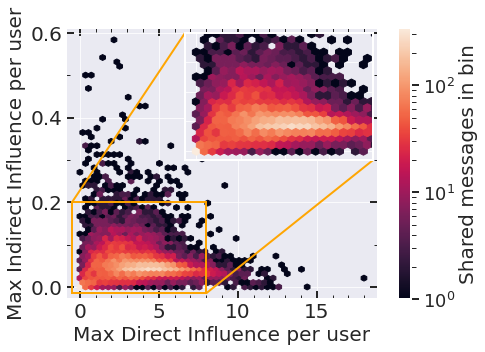

<Figure size 432x288 with 0 Axes>

In [9]:
minorLocatory = AutoMinorLocator(2)
minorLocatorx = AutoMinorLocator(5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.tick_params(axis='both', length=8, width=2, which='major', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)
ax.tick_params(axis='both', length=4, width=1, which='minor', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

xvalues = users_avg_df.MI_max.values  #T.T[0]#
yvalues = users_avg_df.MI_super_max.values  #T.T[1]#

corr = st.spearmanr(xvalues, yvalues)
print(corr)

#plt.hist2d(xvalues,yvalues, bins=4, cmap='Blues')
plt.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # ,cmap='magma_r' Blues magma magma_r viridis
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18, length=8, width=2)
cb.ax.tick_params(length=5, width=1, which='minor')
cb.set_label('Shared messages in bin', fontsize=20)

plt.rcParams.update({'font.family': 'sans-serif', 'axes.linewidth': '2.'})

#plt.title(r'Spearman: $\rho_s = %.2f$'%(corr[0]),fontsize=20)
plt.xlabel('Max Direct Influence per user', fontsize=20)
plt.ylabel('Max Indirect Influence per user', fontsize=20)

# Create the zoomed axes
axins = zoomed_inset_axes(ax, 1.4, loc=1)  # zoom = 3, location = 1 (upper right)
axins.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # cmap='magma_r' Blues magma magma_r viridis

# sub region of the original image
x1, x2, y1, y2 = -0.5, 8, -0.015, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

# draw bboxes of the two regions of the inset axes in the parent axes and
# connect lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="orange", alpha=0.99, lw=2.)

#plt.xlim(-1,5)
#plt.ylim(-1,2)

#plt.xlim(-0.4,10)
#plt.ylim(-0.,0.3)

plt.draw()
# plt.savefig('./cluster-results/'+'scatter-plot-msgs.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

SpearmanrResult(correlation=0.6859003195366584, pvalue=0.0)


/tmp/ipykernel_28472/3863560944.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


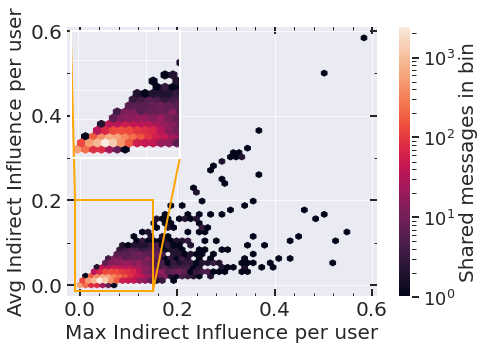

<Figure size 432x288 with 0 Axes>

In [10]:
minorLocatory = AutoMinorLocator(2)
minorLocatorx = AutoMinorLocator(5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.tick_params(axis='both', length=8, width=2, which='major', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)
ax.tick_params(axis='both', length=4, width=1, which='minor', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

xvalues = users_avg_df.MI_super_max.values  #T.T[0]#
yvalues = users_avg_df.MI_super_avg.values  #T.T[1]#

corr = st.spearmanr(xvalues, yvalues)
print(corr)

#plt.hist2d(xvalues,yvalues, bins=4, cmap='Blues')
plt.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # ,cmap='magma_r' Blues magma magma_r viridis
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18, length=8, width=2)
cb.ax.tick_params(length=5, width=1, which='minor')
cb.set_label('Shared messages in bin', fontsize=20)

plt.rcParams.update({'font.family': 'sans-serif', 'axes.linewidth': '2.'})

#plt.title(r'Spearman: $\rho_s = %.2f$'%(corr[0]),fontsize=20)
plt.xlabel('Max Indirect Influence per user', fontsize=20)
plt.ylabel('Avg Indirect Influence per user', fontsize=20)

# Create the zoomed axes
axins = zoomed_inset_axes(ax, 1.4, loc='upper left')  # zoom = 3, location = 1 (upper right)
axins.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # cmap='magma_r' Blues magma magma_r viridis

# sub region of the original image
x1, x2, y1, y2 = -0.01, 0.15, -0.015, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

# draw bboxes of the two regions of the inset axes in the parent axes and
# connect lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="orange", alpha=0.99, lw=2.)

#plt.xlim(-1,5)
#plt.ylim(-1,2)

#plt.xlim(-0.4,10)
#plt.ylim(-0.,0.3)

plt.draw()
# plt.savefig('./cluster-results/'+'scatter-plot-msgs.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

SpearmanrResult(correlation=-0.23642907652103307, pvalue=2.7532096609869412e-148)


/tmp/ipykernel_28472/4045926805.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


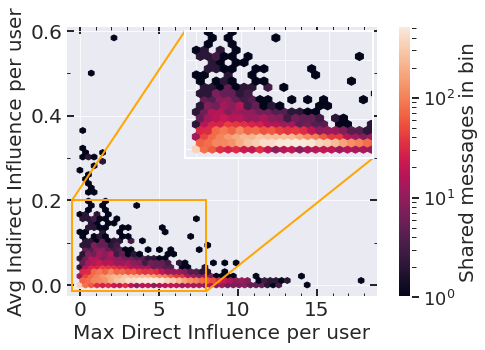

<Figure size 432x288 with 0 Axes>

In [11]:
minorLocatory = AutoMinorLocator(2)
minorLocatorx = AutoMinorLocator(5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.tick_params(axis='both', length=8, width=2, which='major', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)
ax.tick_params(axis='both', length=4, width=1, which='minor', \
               bottom=True, top=True, left=True, \
               right=True, direction='in', labelsize=20)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

xvalues = users_avg_df.MI_max.values  #T.T[0]#
yvalues = users_avg_df.MI_super_avg.values  #T.T[1]#

corr = st.spearmanr(xvalues, yvalues)
print(corr)

#plt.hist2d(xvalues,yvalues, bins=4, cmap='Blues')
plt.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # ,cmap='magma_r' Blues magma magma_r viridis
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18, length=8, width=2)
cb.ax.tick_params(length=5, width=1, which='minor')
cb.set_label('Shared messages in bin', fontsize=20)

plt.rcParams.update({'font.family': 'sans-serif', 'axes.linewidth': '2.'})

#plt.title(r'Spearman: $\rho_s = %.2f$'%(corr[0]),fontsize=20)
plt.xlabel('Max Direct Influence per user', fontsize=20)
plt.ylabel('Avg Indirect Influence per user', fontsize=20)

# Create the zoomed axes
axins = zoomed_inset_axes(ax, 1.4, loc=1)  # zoom = 3, location = 1 (upper right)
axins.hexbin(xvalues, yvalues, gridsize=50, bins='log')  # cmap='magma_r' Blues magma magma_r viridis

# sub region of the original image
x1, x2, y1, y2 = -0.5, 8, -0.015, 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=False)
plt.yticks(visible=False)

# draw bboxes of the two regions of the inset axes in the parent axes and
# connect lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="orange", alpha=0.99, lw=2.)

#plt.xlim(-1,5)
#plt.ylim(-1,2)

#plt.xlim(-0.4,10)
#plt.ylim(-0.,0.3)

plt.draw()
# plt.savefig('./cluster-results/'+'scatter-plot-msgs.pdf',dpi=300,bbox_inches='tight')
plt.show()
plt.clf()

## Gerar UBMGs

In [12]:
from UbmgAssemble import assemble_ubmg, flatten_matrixes, ubmg_df

ubmgs_path = './ubmg-data'

if not os.path.exists(ubmgs_path):
    os.mkdir(ubmgs_path)
    
    assemble_ubmg(unique_users, path, ubmgs_path)

In [13]:
flatten_path = ubmgs_path + '/flattened'

if not os.path.exists(flatten_path):
    os.mkdir(flatten_path)
    
    flatten_matrixes(unique_users, ubmgs_path, flatten_path)

In [15]:
df_path = ubmgs_path + '/dataframe'

if not os.path.exists(df_path):
    os.mkdir(df_path)
    
    ubmg_df(unique_users, flatten_path, df_path)